# Friendship Experiment

In [1]:
from pprint import pprint

import sys
sys.path.append("../dataset")
sys.path.append("../models")
sys.path.append("../evaluation")
from data_loader import DataLoader, FriendEdgeEncoding, GaussianNormalizer, playtime_forever_edge_scoring_function
from random_model import RandomModel
from common_neighbors_model import CommonNeighborsModel
from popularity_model import GamePopularityModel
from collaborative_filtering_model import CollaborativeFiltering
from evaluation import Evaluator

In [2]:
def generate_results_for_experiment(data_loader, data_loader_name):
    print(f'On {data_loader_name}')
    network = data_loader.get_full_network()
    data_loader.load_stratified_user_train_test_network(network=network, train_percentage=0.8, test_percentage=0.2, seed=0)
    data_loader.save_data_loader_parameters(f'friendship_experiment_{data_loader_name}')

    evaluator = Evaluator()
    def eval(model):
        evaluator.reset(model)
        evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 75)
        evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 50)
        evaluator.compute_top_N_hit_percentage_at_user_percentile(10, 25)
        evaluator.plot_top_N_hit_percentage_percentiles(10)
        evaluator.plot_top_N_hit_percentage_percentiles(25)
        evaluator.compute_top_N_hit_percentage(10)
        evaluator.compute_top_N_hit_percentage(25)
        evaluator.compute_user_percentile_positional_error(25)
        evaluator.compute_user_percentile_positional_error(50)
        evaluator.compute_user_percentile_positional_error(75)
        evaluator.plot_log_user_percentile_positional_error()
        evaluator.compute_mean_positional_error()
        evaluator.plot_roc_curve()
        evaluator.compute_auc_roc()
        evaluator.plot_user_based_roc_curve()
        evaluator.compute_user_based_auc_roc()
        evaluator.save_metrics(f'friendship_experiment_{data_loader_name}_{model.name()}')

    random_model = RandomModel()
    random_model.set_data_loader(data_loader)
    random_model.train()
    eval(random_model)

    # popularity_model = GamePopularityModel()
    # popularity_model.set_data_loader(data_loader)
    # popularity_model.train()
    # eval(popularity_model)

    common_neighbors_model = CommonNeighborsModel()
    common_neighbors_model.set_data_loader(data_loader)
    common_neighbors_model.train()
    common_neighbors_model.save(f'friendship_experiment_{data_loader_name}_{common_neighbors_model.name()}')
    eval(common_neighbors_model)

    collaborative_filtering_model = CollaborativeFiltering(num_epochs = 500, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.001, regularization = 0.05)
    collaborative_filtering_model.set_data_loader(data_loader)
    collaborative_filtering_model.train(debug=True)
    collaborative_filtering_model.save(f'friendship_experiment_{data_loader_name}_{collaborative_filtering_model.name()}')
    eval(collaborative_filtering_model)

In [3]:
no_friends_data_loader = DataLoader(friendship_edge_encoding = FriendEdgeEncoding.NONE, edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
between_user_friends_data_loader = DataLoader(friendship_edge_encoding = FriendEdgeEncoding.BETWEEN_USERS, edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
all_friends_data_loader = DataLoader(friendship_edge_encoding = FriendEdgeEncoding.ALL_FRIENDSHIPS, edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])

On no_friends_data_loader
Total Number of Features: 3422500


100%|██████████| 500/500 [02:10<00:00,  3.84it/s]


On between_user_friends_data_loader
Total Number of Features: 3422500


100%|██████████| 500/500 [02:18<00:00,  3.62it/s]


On all_friends_data_loader
Total Number of Features: 3422500


100%|██████████| 500/500 [02:20<00:00,  3.57it/s]


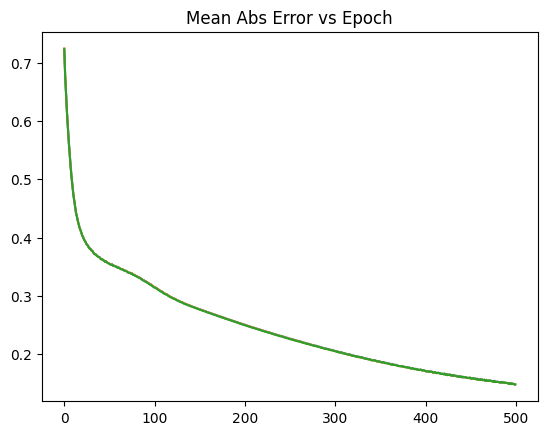

In [4]:
generate_results_for_experiment(no_friends_data_loader, 'no_friends_data_loader')
generate_results_for_experiment(between_user_friends_data_loader, 'between_user_friends_data_loader')
generate_results_for_experiment(all_friends_data_loader, 'all_friends_data_loader')